In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install selenium cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 91.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

def convert_timestamp(timestamp):
    dt_object = datetime.datetime.utcfromtimestamp(timestamp)
    formatted_date_time = dt_object.strftime('%Y-%m-%d %H')
    return formatted_date_time

lat_max, lat_min = 60.0393322852, 59.828
lon_max, lon_min = 30.5360, 30.142969
df=pd.read_csv('/content/drive/My Drive/IBD/train_data.csv')
df.insert(1, 'date', df['timestamp'].apply(convert_timestamp))
df = df[(df['lat']<=lat_max)&(df['lat']>=lat_min)&(df['lon']>=lon_min)&(df['lon']<=lon_max)]
df['weekday']=[date.weekday() for date in pd.to_datetime(df['date'])]
val=pd.read_csv('/content/drive/My Drive/IBD/validation_data.csv')
df

,timestamp,date,lon,lat,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt,point,weekday
0,1565607600,2019-08-12 11,30.329370,59.940488,63,4,52,6,0,0,0,0,0101000020E6100000DBC1F19351543E4006FC5DE561F8...,0
1,1565568000,2019-08-12 00,30.342845,59.869542,44,0,40,0,4,0,0,0,0101000020E6100000544263A8C4573E40C27FCF284DEF...,0
2,1565568000,2019-08-12 00,30.322632,60.039332,30,0,77,7,0,0,0,1,0101000020E61000009E01B90998523E40888919D70805...,0
3,1565568000,2019-08-12 00,30.322632,59.938238,13,0,634,17,32,0,0,7,0101000020E61000009E01B90998523E40CEB8CE2B18F8...,0
4,1565568000,2019-08-12 00,30.309158,59.932612,8,0,0,0,0,0,0,0,0101000020E6100000268147F5244F3E40494A4ED65FF7...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8526521,1565978400,2019-08-16 18,30.324878,59.932612,48,0,15,2,0,0,0,1,0101000020E61000005DECCB372B533E40494A4ED65FF7...,4
8526522,1565978400,2019-08-16 18,30.324878,59.932612,20,1,0,0,0,0,0,0,0101000020E61000005DECCB372B533E40494A4ED65FF7...,4
8526523,1565978400,2019-08-16 18,30.324878,59.932612,54,2,75,7,0,0,0,6,0101000020E61000005DECCB372B533E40494A4ED65FF7...,4
8526524,1565971200,2019-08-16 16,30.324878,59.932612,15,0,350,4,25,0,0,0,0101000020E61000005DECCB372B533E40494A4ED65FF7...,4


In [ ]:
# posts by the day of week
weekdays = df.groupby('weekday').size().reset_index().rename(columns={0:'posts'}).sort_values(by='posts', ascending=False)
total = weekdays['posts'].sum()
weekdays['per cent'] = round(weekdays['posts']/total*100,1)
weekdays

,weekday,posts,per cent
6,6,1309253,15.6
5,5,1284631,15.3
4,4,1194625,14.2
0,0,1170426,14.0
3,3,1159924,13.8
1,1,1139273,13.6
2,2,1130942,13.5


In [ ]:
#the amount of posts for each cube over the whole time
cubes = df.groupby(['lat','lon']).size().reset_index().rename(columns={0:'posts_per_cube'}).sort_values(by='lat', ascending=False).reset_index(drop=True)
cubes

,lat,lon,posts_per_cube
0,60.039332,30.464117,7
1,60.039332,30.360811,2
2,60.039332,30.223818,1512
3,60.039332,30.232801,54
4,60.039332,30.248521,13
...,...,...,...
6799,59.828934,30.500050,2
6800,59.828934,30.513524,9
6801,59.828934,30.522508,97
6802,59.828934,30.535982,4045


In [ ]:
from folium.plugins import HeatMap
import folium

m = folium.Map([60, 30.2], tiles="Stamen Terrain")
HeatMap(cubes[(cubes['lat']>59.9)&(cubes['lat']<59.95)].values.tolist(),gradient={0.8: 'blue', 0.9:'green',1: 'lime'}).add_to(m)
m

In [ ]:
#uploading districts of Spb
import geopandas as gpd
from shapely.geometry import Point

def get_polygon_name(point):
    for idx, polygon in districts.iterrows():
        if point.within(polygon['geometry']):
            return polygon['name']
    return None

districts = gpd.read_file('/content/drive/My Drive/IBD/18 районов Петербурга.geojson')
districts = districts.drop(19, axis=0)
target_crs = 'EPSG:4326'
# Reproject the GeoDataFrame to the target coordinate system
districts = districts.to_crs(target_crs)
districts

,name,buffer,geometry
0,Адмиралтейский район,0,"POLYGON ((30.25385 59.90024, 30.25531 59.90056..."
1,Василеостровский район,0,"POLYGON ((30.21308 59.96326, 30.18288 59.96017..."
2,Выборгский район,0,"POLYGON ((30.32295 59.97909, 30.32861 59.97634..."
3,Калининский район,0,"POLYGON ((30.38681 60.05833, 30.36535 60.03424..."
4,Кировский район,0,"POLYGON ((30.25770 59.91744, 30.21367 59.91701..."
5,Колпинский район,0,"POLYGON ((30.45273 59.81790, 30.49427 59.79563..."
6,Красногвардейский район,0,"POLYGON ((30.43693 60.02155, 30.43813 60.01983..."
7,Красносельский район,0,"POLYGON ((30.11404 59.69443, 30.11438 59.69434..."
8,Красносельский район,0,"POLYGON ((30.11037 59.72147, 30.10958 59.72422..."
9,Кронштадтский район,0,"POLYGON ((29.60769 60.04194, 29.64889 60.01450..."


In [ ]:
cubes['Point'] = [Point(xy) for xy in zip(cubes['lon'], cubes['lat'])]
cubes['name'] = cubes.apply(lambda row: get_polygon_name(row['Point']), axis=1).fillna('Not classified').astype(str)
DIST = cubes.groupby('name').size().reset_index().rename(columns={0:'posts'})
DIST

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
map=gpd.GeoDataFrame(DIST.drop(0, axis=0).merge(districts, on='name', how='left')).set_index('name').drop('buffer',axis=1)
fig = px.choropleth_mapbox(
    map,
    geojson=map.geometry,
    locations=map.index,
    color="posts",
    opacity = 0.5,
    center = dict(lat = 59.95, lon = 30.3),
    range_color=(200, 1000),
    color_continuous_scale = 'viridis',
    mapbox_style = "open-street-map",
    width=400,
    height=300
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# Show the plot
fig.show()

In [ ]:
"""It's pre-processed file for training. If you want to see how it's created, check the next cell!"""
by_hour=pd.read_csv('/content/drive/My Drive/IBD/by_hour.csv', header=0,index_col=False)
by_hour['dist']=by_hour['dist'].astype('category')
by_hour

,lat,lon,date,pph,hour,day,month,year,Point,dist
0,59.828934,30.151953,2019-01-19 07:00:00,1,7,19,1,2019,POINT (30.15195251147173 59.82893394227072),Красносельский район
1,59.828934,30.151953,2019-04-23 18:00:00,1,18,23,4,2019,POINT (30.15195251147173 59.82893394227072),Красносельский район
2,59.828934,30.151953,2019-11-27 10:00:00,1,10,27,11,2019,POINT (30.15195251147173 59.82893394227072),Красносельский район
3,59.828934,30.151953,2020-01-19 02:00:00,1,2,19,1,2020,POINT (30.15195251147173 59.82893394227072),Красносельский район
4,59.828934,30.156444,2019-01-01 15:00:00,1,15,1,1,2019,POINT (30.15644408789233 59.82893394227072),Красносельский район
...,...,...,...,...,...,...,...,...,...,...
3587580,60.039332,30.464117,2019-09-08 10:00:00,1,10,8,9,2019,POINT (30.46411707270327 60.03933228251395),NaN
3587581,60.039332,30.464117,2019-09-12 17:00:00,1,17,12,9,2019,POINT (30.46411707270327 60.03933228251395),NaN
3587582,60.039332,30.464117,2019-09-26 17:00:00,1,17,26,9,2019,POINT (30.46411707270327 60.03933228251395),NaN
3587583,60.039332,30.464117,2019-10-25 18:00:00,1,18,25,10,2019,POINT (30.46411707270327 60.03933228251395),NaN


In [ ]:
#count posts per hour (pph)
by_hour = df.groupby(['lat', 'lon','date']).size().reset_index().rename(columns={0:'pph'})

by_hour['date'] = pd.to_datetime(by_hour['date'])
by_hour['hour'] = by_hour['date'].dt.hour
by_hour['day'] = by_hour['date'].dt.day
by_hour['month'] = by_hour['date'].dt.month
by_hour['year'] = by_hour['date'].dt.year
by_hour['weekday'] = [date.weekday() for date in by_hour['date']]
by_hour['Point'] = [Point(xy) for xy in zip(by_hour['lon'], by_hour['lat'])]
by_hour['dist'] = by_hour.apply(lambda row: get_polygon_name(row['Point']), axis=1).fillna('Not classified').astype('category')
by_hour.to_csv('/content/drive/My Drive/IBD/by_hour.csv', index=False)
by_hour

,lat,lon,date,pph,hour,day,month,year,weekday,Point,dist
0,59.828934,30.151953,2019-01-19 07:00:00,1,7,19,1,2019,5,POINT (30.15195251147173 59.82893394227072),Красносельский район
1,59.828934,30.151953,2019-04-23 18:00:00,1,18,23,4,2019,1,POINT (30.15195251147173 59.82893394227072),Красносельский район
2,59.828934,30.151953,2019-11-27 10:00:00,1,10,27,11,2019,2,POINT (30.15195251147173 59.82893394227072),Красносельский район
3,59.828934,30.151953,2020-01-19 02:00:00,1,2,19,1,2020,6,POINT (30.15195251147173 59.82893394227072),Красносельский район
4,59.828934,30.156444,2019-01-01 15:00:00,1,15,1,1,2019,1,POINT (30.15644408789233 59.82893394227072),Красносельский район
...,...,...,...,...,...,...,...,...,...,...,...
3587580,60.039332,30.464117,2019-09-08 10:00:00,1,10,8,9,2019,6,POINT (30.46411707270327 60.03933228251395),Not classified
3587581,60.039332,30.464117,2019-09-12 17:00:00,1,17,12,9,2019,3,POINT (30.46411707270327 60.03933228251395),Not classified
3587582,60.039332,30.464117,2019-09-26 17:00:00,1,17,26,9,2019,3,POINT (30.46411707270327 60.03933228251395),Not classified
3587583,60.039332,30.464117,2019-10-25 18:00:00,1,18,25,10,2019,4,POINT (30.46411707270327 60.03933228251395),Not classified


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(by_hour.loc[:, ~by_hour.columns.isin(['pph','date', 'Point'])],
                                                    by_hour['pph'], test_size = 0.3, random_state = 42,
                                                    shuffle = True)

In [ ]:
#TO search the best hyperparams
%time model = XGBRegressor(objective = 'reg:squarederror', random_state = 42, n_estimators = 700, n_jobs = -1)

param_grid = {'eta': [0.001, 0.01, 0.1] ,'gamma': [0.01, 0.1, 0.4, 5], 'max_depth': [7,8,9]}

search = GridSearchCV(model, param_grid, cv = 3, scoring = 'r2').fit(X_train, y_train)

model = XGBRegressor(eta = search.best_params_['eta'], gamma = search.best_params_['gamma'],
                    max_depth = search.best_params_['max_depth'],
                    n_estimators = search.best_params_['n_estimators'],
                    objective = search.best_params_['objective'], reg_lambda = search.best_params_['reg_lambda'],
                    random_state = search.best_params_['random_state'])

In [ ]:
model = XGBRegressor(tree_method="hist", enable_categorical=True, device="cuda", eta = 0.1,gamma=0.4,
                    max_depth = 9, n_jobs = -1,
                    n_estimators = 700,
                    objective = 'reg:squarederror',
                    random_state = 42)
#model.load_model("/content/drive/My Drive/IBD/xgboost.json")
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[09:30:32] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=True, eta=0.1, eval_metric=None,
             feature_types=None, gamma=0.4, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
predictions = model.predict(X_test)

preds = pd.DataFrame({"pph":np.round(predictions)})

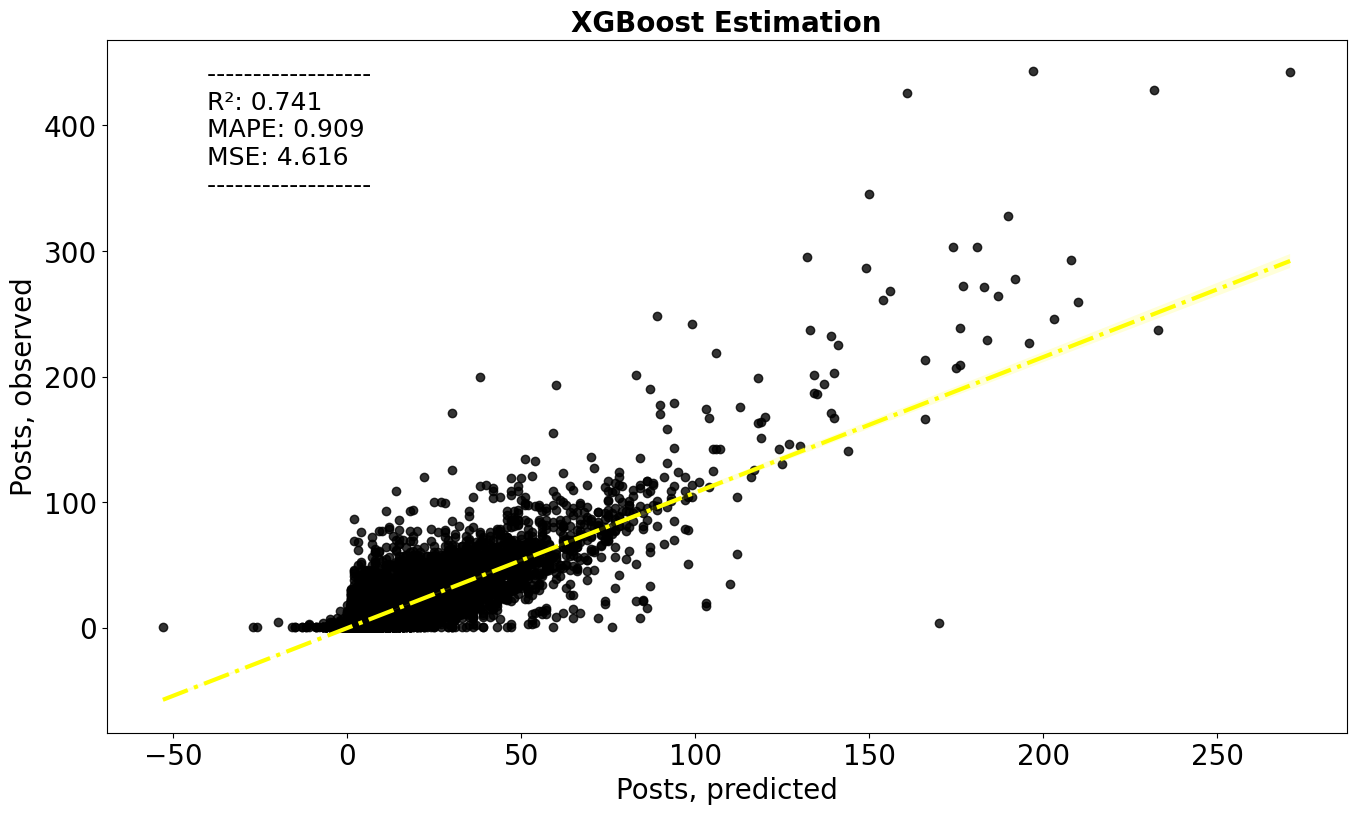

In [ ]:
"""New model"""
plt.rcParams.update({'font.size': 20, 'figure.figsize': (16, 9)})
r2 = np.round(r2_score(y_test, preds),3)
MAPE = np.round(mean_absolute_error(y_test, preds),3)
MSE = np.round(mean_squared_error(preds, y_test),3)

sns.regplot(x=preds, y=y_test, color = 'black', line_kws = {'color': 'yellow',
                                                'linestyle':'-.','linewidth': 3.0})

plt.plot([], [], ' ',
         label=f" ------------------\n R\u00b2: {r2} \n MAPE: {MAPE} \n MSE: {MSE} \n ------------------\n")
plt.legend(loc='upper left', frameon = False, fontsize = 18)
plt.xlabel('Posts, predicted', fontdict={'fontsize': 20})
plt.ylabel('Posts, observed', fontdict={'fontsize': 20})
plt.title(f'XGBoost Estimation', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.savefig('XGBoost_categorical.png')
plt.show()

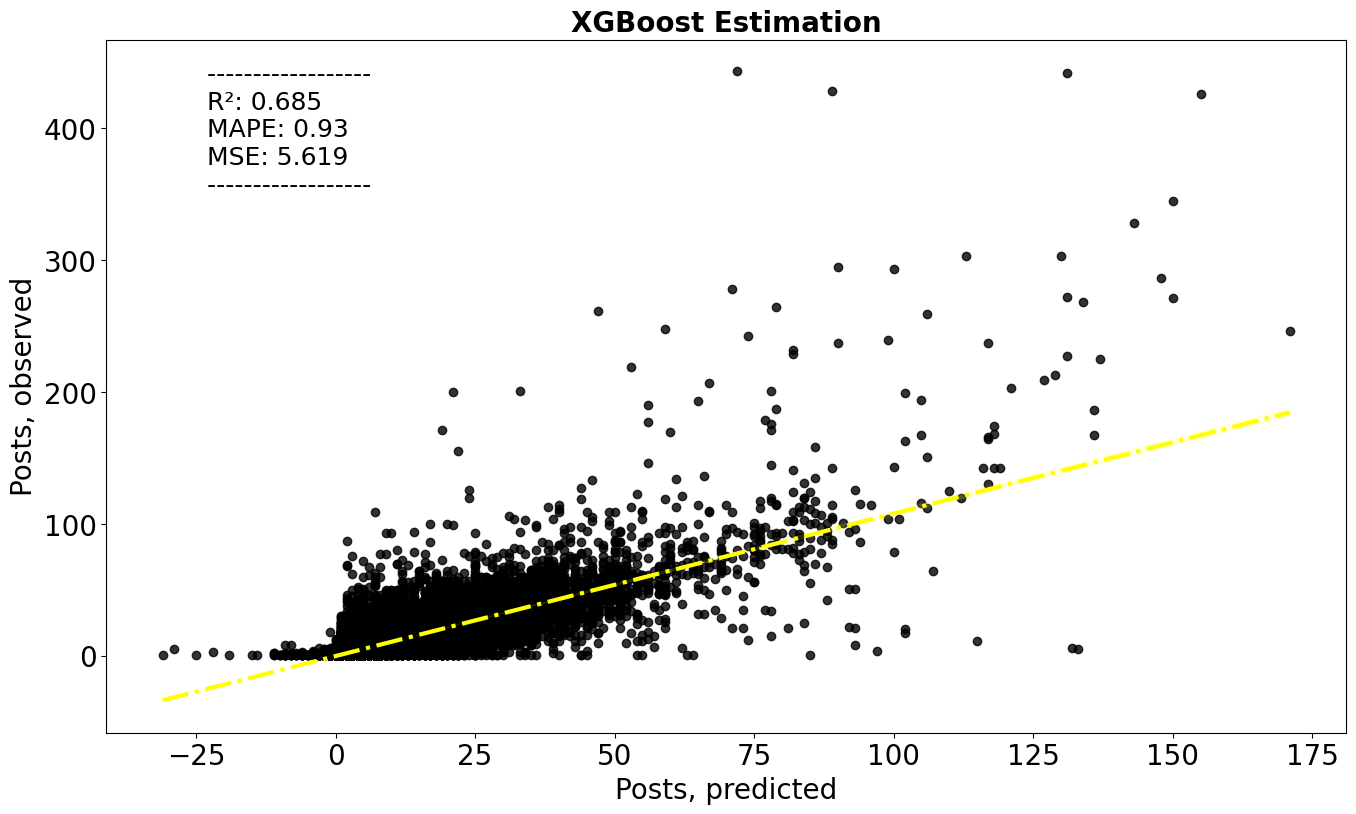

In [ ]:
"""Old model"""
plt.rcParams.update({'font.size': 20, 'figure.figsize': (16, 9)})
r2 = np.round(r2_score(y_test, preds),3)
MAPE = np.round(mean_absolute_error(y_test, preds),3)
MSE = np.round(mean_squared_error(preds, y_test),3)

sns.regplot(x=preds, y=y_test, color = 'black', line_kws = {'color': 'yellow',
                                                'linestyle':'-.','linewidth': 3.0})

plt.plot([], [], ' ',
         label=f" ------------------\n R\u00b2: {r2} \n MAPE: {MAPE} \n MSE: {MSE} \n ------------------\n")
plt.legend(loc='upper left', frameon = False, fontsize = 18)
plt.xlabel('Posts, predicted', fontdict={'fontsize': 20})
plt.ylabel('Posts, observed', fontdict={'fontsize': 20})
plt.title(f'XGBoost Estimation', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.savefig('XGBoost.png')
plt.show()

In [ ]:
def converT(data, is_generating=False):
    if not is_generating:
      data = data.drop('point', axis=1)
      data.insert(0, 'date', data['hour'].apply(convert_timestamp))
    data['date'] = pd.to_datetime(data['date'])
    data['hour'] = data['date'].dt.hour
    data['day'] = data['date'].dt.day
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['weekday'] = [date.weekday() for date in pd.to_datetime(data['date'])]
    data['Point'] = [Point(xy) for xy in zip(data['lon'], data['lat'])]
    data['dist'] = data.apply(lambda row: get_polygon_name(row['Point']), axis=1).fillna('Not classified').astype('category')
    if not is_generating:
      data = data.reindex(columns=X_train.columns)
    return data
validation = converT(val)
validation

,lat,lon,hour,day,month,year,weekday,dist
0,59.926986,30.318141,9,23,2,2020,6,Адмиралтейский район
1,59.924735,30.241784,19,20,2,2020,3,Василеостровский район
2,60.002300,30.295683,15,9,2,2020,6,Приморский район
3,59.935988,30.324878,17,17,2,2020,0,Центральный район
4,59.933737,30.306912,5,27,2,2020,3,Адмиралтейский район
...,...,...,...,...,...,...,...,...
681,59.905597,30.297929,16,2,2,2020,6,Адмиралтейский район
682,59.950610,30.315895,4,7,2,2020,4,Петроградский район
683,59.933737,30.309158,5,14,2,2020,4,Адмиралтейский район
684,59.931487,30.358565,10,3,2,2020,0,Центральный район


In [ ]:
"""XGBoost validation"""
val_preds = model.predict(validation)
val['pred'] = val_preds
val['E'] = round((np.abs(val['pred']-val['sum']))/val['pred'],6)
print(f"Number of cubes with error higher than the baseline :{len(val[val['E']>val['error']])}\nMean error: {round(val['E'].mean(),2)}")

Number of cubes with error higher than the baseline :199
Mean error: 0.85


# Time series generating (since 01-01-2021)

In [ ]:
dates = pd.to_datetime(pd.date_range(start='2020-02-01 00', end='2020-02-29 00', freq='H'))
lons = validation.lon
lats = validation.lat
D = {}
for lat, lon in zip(lats, lons):
  D[f'{lat}_{lon}']=pd.DataFrame({'date': dates, 'lat': [lat]*len(dates), 'lon': [lon]*len(dates)})
  D[f'{lat}_{lon}']=converT(D[f'{lat}_{lon}'], is_generating=True)
  D[f'{lat}_{lon}']['pph']=np.round(model.predict(D[f'{lat}_{lon}'].loc[:, ~D[f'{lat}_{lon}'].columns.isin(['sum','date', 'error','Point'])]))

In [ ]:
i=0
for lat, lon in zip(lats, lons):
  if i==0:
    d = D[f'{lat}_{lon}']
  else:
    d=pd.concat([d,D[f'{lat}_{lon}']], ignore_index=True)
  i=1

<ipython-input-251-7d62a71865bc>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



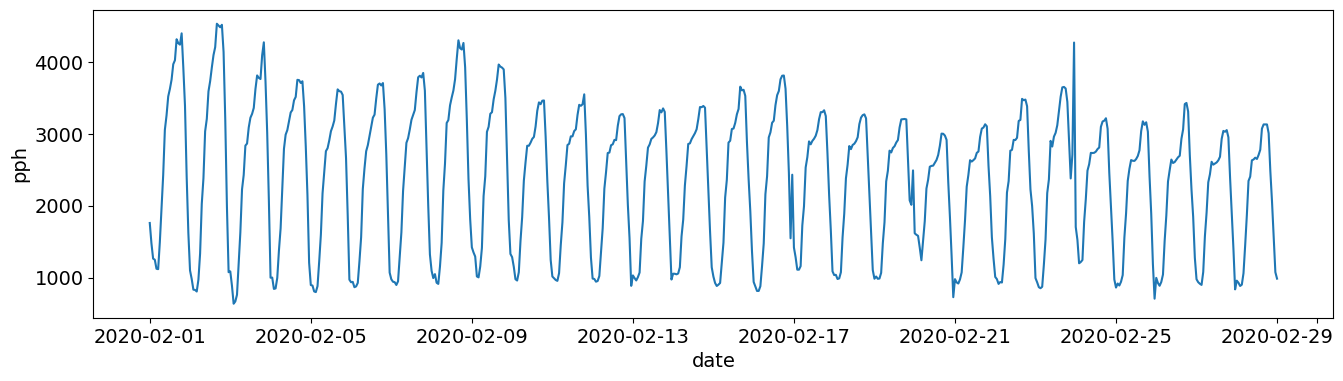

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
#d = d.groupby(['date'])['date', 'pph'].sum('pph')
fig = plt.figure(figsize=(16,4))
plt.plot(d)
ax = plt.gca()
labels = ax.get_xticklabels()
# remove the first and the last labels
labels[-1] = ""
# set these new labels
ax.set_xticklabels(labels)
plt.xlabel('date')
plt.ylabel('pph')
plt.savefig('timeseries.png')